In [22]:
import zipfile
zip_ref=zipfile.ZipFile(r"C:\Users\SHASHANK\Downloads\archive (7).zip")
zip_ref.extractall('/extracted')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

Generator for loading image data

In [24]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/extracted/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)  

Found 20000 files belonging to 2 classes.


In [25]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/extracted/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)  

Found 5000 files belonging to 2 classes.


In [26]:
#Normalize
def process(image,label):
    image= tf.cast(image/255. ,tf.float32)
    return image,label
train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)


Training the model

In [27]:
from keras.layers import BatchNormalization,Dropout
from keras import regularizers
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3),kernel_regularizer=regularizers.l2(0.001)))  #Convolutional layer
model.add(BatchNormalization())     #Normalization layer(for normalize the images)
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))  #Pooling layer
model.add(Dropout(0.3)) 

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.3)) 

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.3)) 

model.add(Flatten())     #Flattening layer

model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001)))  #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.3))    #Dropout layer
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1,activation='sigmoid'))



In [28]:
from tensorflow.keras.optimizers import Adam

# Define optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.001)  # Set the initial learning rate here

# Compile model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback to reduce learning rate when accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Callback to stop training early if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)



In [30]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds,callbacks=[reduce_lr,early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1458s 2s/step - accuracy: 0.6220 - loss: 1.3828 - val_accuracy: 0.6632 - val_loss: 1.0347 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1415s 2s/step - accuracy: 0.7142 - loss: 0.9992 - val_accuracy: 0.5302 - val_loss: 1.4603 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7659 - loss: 1.0701
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 ━━━━━━━━━━━━━━━━━━━━ 1353s 2s/step - accuracy: 0.7659 - loss: 1.0702 - val_accuracy: 0.6714 - val_loss: 1.1727 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1333s 2s/step - accuracy: 0.7998 - loss: 0.9285 - val_accuracy: 0.7842 - val_loss: 0.9657 - learning_rate: 5.0000e-04
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1333s 2s/step - accuracy: 0.8271 - loss: 0.9233 - val_accuracy: 0.8084 - val_loss: 0.9940 - learning_rate: 5.0000e-04
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8422 - 

Plotting the graph to compare between accuracy and Val_accuracy

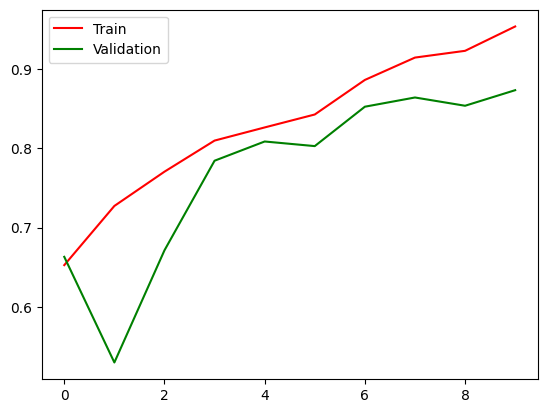

In [31]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='green',label='Validation')
plt.legend()
plt.show()

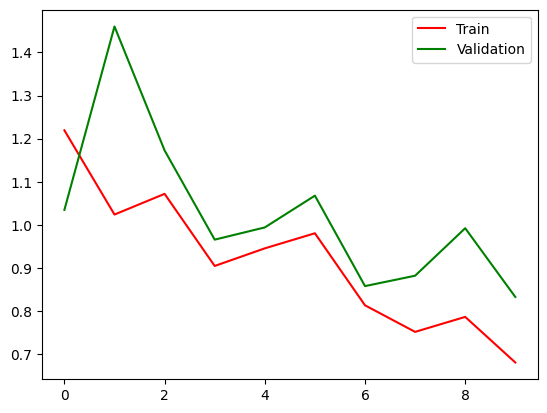

In [32]:

plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='green',label='Validation')
plt.legend()
plt.show()

Loading new unknown data

In [33]:
import cv2

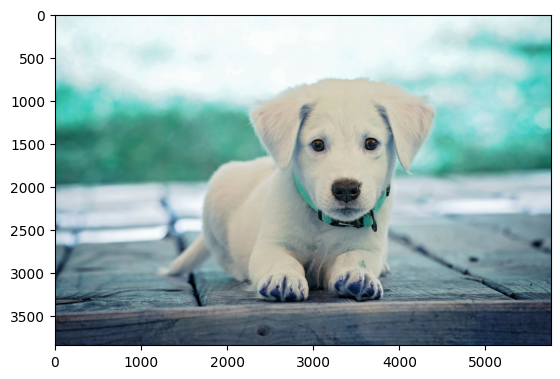

In [34]:
test_img= cv2.imread(r"C:\Users\SHASHANK\Downloads\dog.jpg")
plt.imshow(test_img)

In [35]:
test_img.shape

(3840, 5760, 3)

In [36]:
test_img= cv2.resize(test_img,(256,256))

test_input= test_img.reshape(1,256,256,3) #to provide the input as batch so we defined batch size of 1

In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

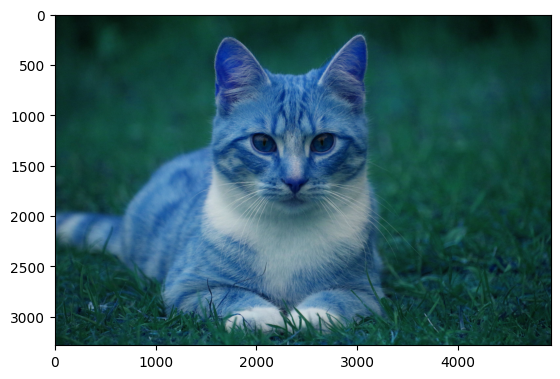

In [38]:
test_img2=cv2.imread(r"c:\Users\SHASHANK\Downloads\catt.jpg")
plt.imshow(test_img2)

In [39]:
test_img2= cv2.resize(test_img2,(256,256))

test_input2= test_img2.reshape(1,256,256,3)

In [40]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.]], dtype=float32)